In [3]:
import math
import numpy
import matplotlib.pyplot as pyplot

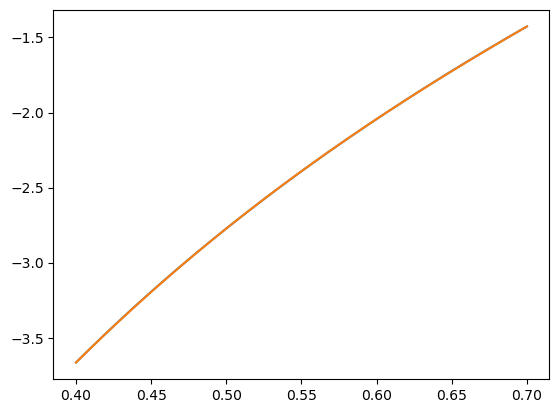

0.0002720692435922616


In [61]:
def f(x):
    return numpy.log(x ** 4)

xs = numpy.linspace(0.4, 0.7, 4)
ys = f(xs)

def interpolate(xs, ys):
    def polynomial(x):
        y = 0
        for xk, yk in zip(xs, ys):
            yi = 1
            for xi in xs:
                if xi != xk:
                    yi *= (x - xi) / (xk - xi)
            y += yi * yk
        return y
    return polynomial

xaxis = numpy.linspace(xs.min(), xs.max(), 1000)
pyplot.plot(xaxis, f(xaxis))
pyplot.plot(xaxis, interpolate(xs, ys)(xaxis))
pyplot.show()

print(abs((f(0.55) - interpolate(xs, ys)(0.55)) / f(0.55)))


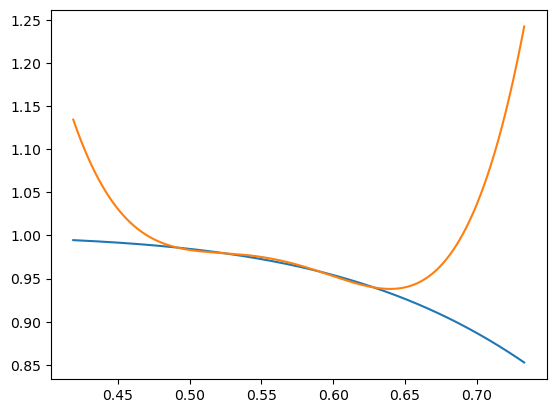

0.9528757677871996


In [55]:
def f(x):
    return numpy.cos(x ** 3) ** 2

xs = numpy.array([numpy.pi / 6, numpy.pi / 6, numpy.pi / 6, numpy.pi / 5, numpy.pi / 5])
ys = numpy.array([f(numpy.pi / 6), -0.232896, -1.09356 * 2, f(numpy.pi / 5), -0.563751])

def divided_difference(xs, ys, start, count):
    if xs[start] == xs[start + count - 1]:
        first = start
        while first > 0:
            if xs[first - 1] == xs[start]:
                first -= 1
            else:
                break
        return ys[first + count - 1] / math.factorial(count)
    else:
        return (divided_difference(xs, ys, start + 1, count - 1) - divided_difference(xs, ys, start, count - 1)) / (xs[start + count - 1] - xs[start])

def interpolate(xs, ys):
    def polynomial(x):
        y = 0
        multiplier = 1
        for i, xi in enumerate(xs):
            y += divided_difference(xs, ys, 0, i + 1) * multiplier
            multiplier *= x - xi
        return y
    return polynomial


d = xs.max() - xs.min()
xaxis = numpy.linspace(xs.min() - d, xs.max() + d, 1000)
pyplot.plot(xaxis, f(xaxis))
pyplot.plot(xaxis, interpolate(xs, ys)(xaxis))
pyplot.show()

print(interpolate(xs, ys)(0.6))


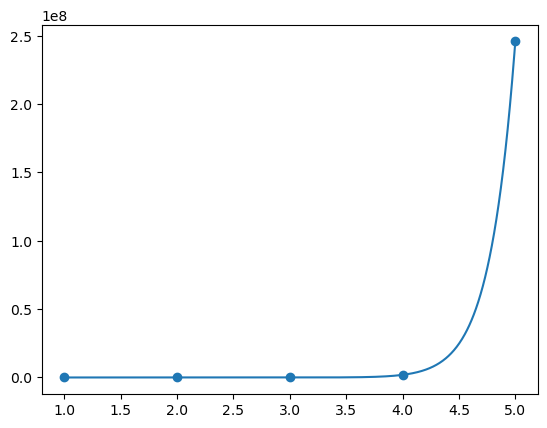

In [41]:
xs = numpy.array([1, 2, 3, 4, 5])
ys = numpy.array([1, 128, 15000, 1.92 * (10 ** 6), 245.76 * (10 ** 6)])

basis = numpy.array([lambda x, k=k: numpy.e ** (k * x) for k in range(len(xs))])
matrix = numpy.array([numpy.array([function(x) for function in basis]) for x in xs])
solution = numpy.linalg.solve(matrix, ys)

def generalized_polynomial(solution, basis):
    def polynomial(x):
        y = 0
        for coeff, function in zip(solution, basis):
            y += coeff * function(x)
        return y
    return polynomial

pyplot.scatter(xs, ys)
xaxis = numpy.linspace(xs.min(), xs.max(), 1000)
pyplot.plot(xaxis, generalized_polynomial(solution, basis)(xaxis))
pyplot.show()
